In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Baseline models hyperparameters
- **DummyRegressor** model: strategy "mean"
- **DecisionTreeRegressor** model: scikit-learn default parameters (criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
- **LinearSVR** model: scikit-learn default parameters (epsilon=0.0, tol=0.0001, C=1.0, loss='epsilon_insensitive)
- **MLP** model: 3 dense layers, with 32, 16 and 1 neurons respectively, and activation function "relu"
- **XGBoost** model: default parameters

#### Each model is evaluated on the test set with mean squared error.

In [11]:
baseline_model = ['Dummy', 'DecisionTree', 'LinearSVR', 'MLP', 'XGBoost']
baseline_loss_single_season = [6.1849, 9.0070, 5.2085, 4.7281, 4.7886]
baseline_loss_merged_seasons = [6.2046, 9.3802, 5.2094, 4.4922, 4.6144]


In [12]:
# create dataframe with baseline_model as columns and scores as values
baseline_model_scores = pd.DataFrame(data=np.array([baseline_loss_single_season, baseline_loss_merged_seasons]), columns=baseline_model, index=['single_season', 'merged_seasons'])

In [13]:
baseline_model_scores

,Dummy,DecisionTree,LinearSVR,MLP,XGBoost
single_season,6.1849,9.0070,5.2085,4.7281,4.7886
merged_seasons,6.2046,9.3802,5.2094,4.4922,4.6144


### Conclusion
We can see that increasing number of data samples isn't improving mean squared error, especially for simpler models like DecisionTreeRegressor. There is little improvement for MLP and XGBoost models, which are more complex and better handle bigger data.
To be sure that the model trained with more data is better I need to create my own evaluation, checking how many points did selected FPL squad gained.
Also, I'll add more features to the data, which will consist some information about previous performances of each player.

## Next iteration of data preprocessing

In [14]:
baseline_loss_rolling_features = [6.2294, 9.3771, 5.0866, 4.4743, 4.5560]
baseline_loss_opponent_stats = [6.1980, 9.2768, 5.0600, 4.3868, 4.4320]

In [15]:
# create dataframe with baseline_model as columns and scores as values
baseline_model_scores = pd.DataFrame(data=np.array([baseline_loss_rolling_features, baseline_loss_opponent_stats]), columns=baseline_model, index=['rolling_features', 'opponent_stats'])

In [16]:
baseline_model_scores

,Dummy,DecisionTree,LinearSVR,MLP,XGBoost
rolling_features,6.2294,9.3771,5.0866,4.4743,4.556
opponent_stats,6.1980,9.2768,5.0600,4.3868,4.432


### Conclusion #2
There is little improvement in terms of mean squared error for the models with more features datasets, but it isn't informative.
I created my own evaluation, checking how many points did squad selected by model gained, and how is it compared to the points gained by average real FPL player.
Problem with this evaluation metric is that, best squad is selected without money constraints, which is 'cheating', but on the next steps I will create real squad selection optimizator, which will be able to select squad with money constraints.

In [18]:
models = ['MLP', 'XGBoost', 'Average FPL']
points_gained_merged_seasons = [1610, 1576, 1386]
points_gained_rolling_features = [1626, 1553, 1386]
points_gained_opponent_stats = [1770, 1703, 1386]

In [19]:
# create dataframe with baseline_model as columns and scores as values
points_gained = pd.DataFrame(data=np.array([points_gained_merged_seasons, points_gained_rolling_features, points_gained_opponent_stats]), columns=models, index=['merged_seasons', 'rolling_features', 'opponent_stats'])

In [20]:
points_gained

,MLP,XGBoost,Average FPL
merged_seasons,1610,1576,1386
rolling_features,1626,1553,1386
opponent_stats,1770,1703,1386


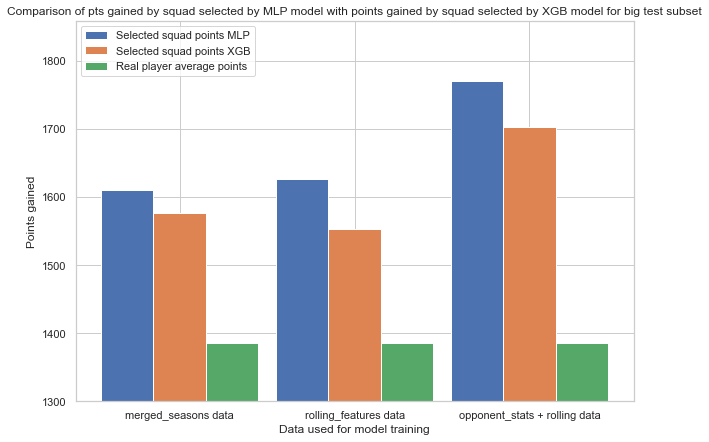

In [47]:
plt.figure(figsize=(10,7))

X_axis = np.arange(3)

plt.bar(X_axis - 0.3, points_gained['MLP'], 0.3, label = 'Selected squad points MLP')
plt.bar(X_axis, points_gained['XGBoost'], 0.3, label = 'Selected squad points XGB')
plt.bar(X_axis + 0.3, points_gained['Average FPL'], 0.3, label = 'Real player average points')

plt.xticks(X_axis, ['merged_seasons data', 'rolling_features data', 'opponent_stats + rolling data'])
plt.xlabel("Data used for model training")
plt.ylabel("Points gained")
plt.ylim(1300)
plt.title("Comparison of pts gained by squad selected by MLP model with points gained by squad selected by XGB model for big test subset")
plt.legend(loc='upper left')
plt.show()